In [52]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy.functions import exp

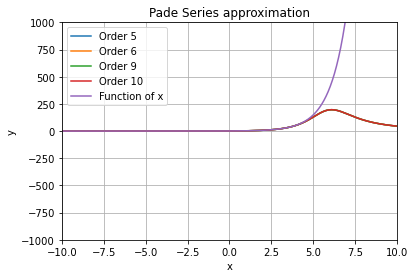

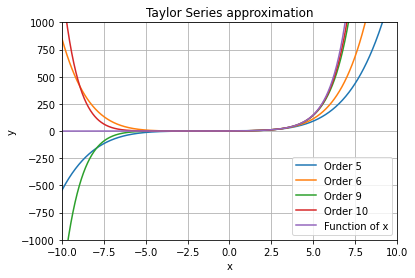

In [55]:
def factorial(n : int) -> int: 
    if n <= 0:
        return 1
    else:
        return n * factorial(n - 1)

def taylor(function, x0, n, x = sy.Symbol('x')):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(factorial(i))*(x - x0)**i
        i += 1
    return p

def pade_exp(p,q, x = sy.Symbol('x')):
    i = 0
    res_P = 0
    res_Q = 0
    while i <= p:
        res_P = res_P + factorial(p+q-i)*factorial(p)*(x)**i/(factorial(p+q)*factorial(i)*factorial(p-i))
        i += 1
    i= 0
    while i <= q:
        res_Q = res_Q + factorial(p+q-i)*factorial(q)*(-x)**i/(factorial(p+q)*factorial(i)*factorial(q-i))
        i += 1
    return res_P/res_Q

def plot(f,  order_tuple , method , x0 = 0, x_lims = [-10, 10], y_lims = [-1000, 1000], npoints = 800, x = sy.Symbol('x')):
    x1 = np.linspace(x_lims[0], x_lims[1], npoints)
    # Approximate up until n starting from 1 and using steps of by
    if method in ["taylor"]:
        for j in order_tuple:
            func = taylor(f, x0, j)
            taylor_lambda = sy.lambdify(x, func, "numpy")
            plt.plot(x1, taylor_lambda(x1), label = 'Order '+ str(j))
    if method in ["pade"]:
        for j in order_tuple:
            func = pade_exp(4,4)
            pade_lambda = sy.lambdify(x, func, "numpy")
            plt.plot(x1, pade_lambda(x1), label = 'Order '+ str(j))

    func_lambda = sy.lambdify(x, f, "numpy")
    plt.plot(x1, func_lambda(x1), label = 'Function of x')
    
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    if method in ["taylor"]:
        plt.title('Taylor Series approximation')
    if method in ["pade"]:
        plt.title('Pade Series approximation')
    plt.show()

# Exponential function
x = sy.Symbol('x')
f = exp(x)
plot(f, (5,6,9,10), "pade")
plot(f, (5,6,9,10), "taylor")

## Taylor interpolation

### As we can appreciate in the previous graphs, for the Taylor interpolation goes really wrong on the left side and it works fine for the right side

### This is mostly related as we are relying only on polynomial functions which can be even or odd, creating always a mirror symmetry along y axis, if we increase the degree of the polynomial it is expected to always get a tail on the left side

## Pade interpolation

### For the Pade interpolation goes wrong on the right side of the exponential function and it works fine for the left side 

### As it is a rational function tends to converge to a value as we approx to the infinity, as it works better for the left side , we could combine those two interpolations around x=0